In [2]:
from PIL import Image
import pylab as plt
import numpy as np
import matplotlib.pyplot as pplt
import cv2
import math
%matplotlib inline

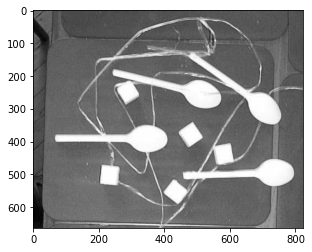

In [3]:
image = cv2.imread('image.png')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap='gray')

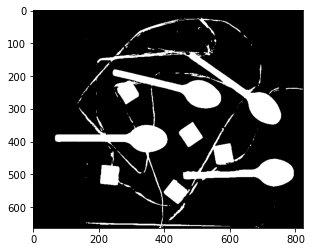

In [4]:
_,img2 = cv2.threshold(gray_image, 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img2, cmap="gray")

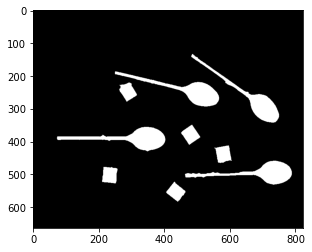

In [5]:
erode = cv2.erode(img2,cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),iterations = 3)
plt.imshow(erode, cmap="gray")

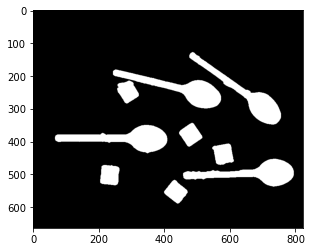

In [6]:
dilate = cv2.dilate(erode, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7)),iterations = 2)
plt.imshow(dilate, cmap="gray")

In [14]:
counturs, hierarchy = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt_area = []
for cnt in counturs:
    area = cv2.contourArea(cnt)
    cnt_area.append(area)
indices = np.array(cnt_area).argsort()
sorted_area = sorted(cnt_area)
print(f"sorted areas: {sorted_area} \n - their indexes: {indices}")
border_val_id = np.argmax(np.diff(sorted_area))
border_value=sorted_area[border_val_id]

sorted areas: [2922.0, 2935.5, 2966.5, 3042.0, 3078.5, 11379.0, 11793.5, 11859.0, 12434.0] 
 - their indexes: [0 6 5 1 3 8 2 7 4]


In [19]:
sugar=indices[:border_val_id+1]
spoons=indices[border_val_id+1:]

Object number: 9
Spoons: 4
Sugar: 5


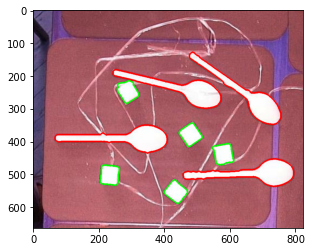

In [20]:
countour_img = image.copy()
print(f"Object number: {len(indices)}")
print(f"Spoons: {len(spoons)}")
print(f"Sugar: {len(sugar)}")
cv2.drawContours(countour_img, counturs, 2, (0,255,0),3)
for i in indices:
    if i in sugar:
        cv2.drawContours(countour_img, counturs, i, (0,255,0),3)
    else:
        cv2.drawContours(countour_img, counturs, i, (255,0,0),3)
plt.imshow(countour_img)